In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [ ]:
from pyts.datasets import make_cylinder_bell_funnel

In [ ]:
X, y = make_cylinder_bell_funnel(n_samples=1000, random_state=42)

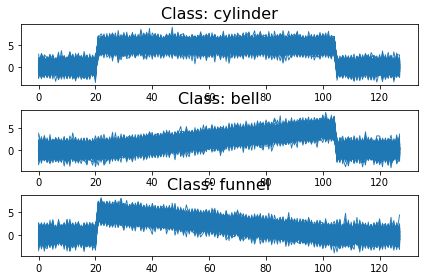

In [ ]:
plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining1.csv', header=0, index_col='date', date_parser = dateparse)
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
light = df[["Temperature", "Occupancy"]]

In [ ]:
ts_light=[]
ts_light_labels=[]
for i in range(0,len(light),20):
    try:
        if len(light.iloc[i:i+60,0].to_list())==60:
            ts_light.append(light.iloc[i:i+60,0].to_list())
            ts_light_labels.append(light.iloc[i:i+60,1].mean())
        else:
            pass
    except:
        pass
ts_light_labels=[1 if x>0.65 else 0 for x in ts_light_labels]

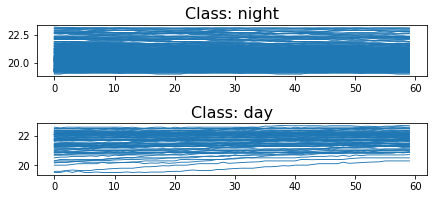

In [ ]:
ts_labels=np.array(ts_light_labels)
ts=np.array(ts_light)

plt.figure()
for i, classe in enumerate(['night', 'day']):
    plt.subplot(3, 1, i + 1)
    for x in ts[ts_labels == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.9)
plt.show()

In [ ]:
ts

array([[23.18      , 23.15      , 23.15      , ..., 22.39      ,
        22.39      , 22.29      ],
       [22.89      , 22.89      , 22.89      , ..., 22.2       ,
        22.245     , 22.2       ],
       [22.6       , 22.6       , 22.6       , ..., 22.1       ,
        22.1       , 22.1       ],
       ...,
       [20.29      , 20.29      , 20.29      , ..., 20.4175    ,
        20.46333333, 20.5       ],
       [20.29      , 20.29      , 20.29      , ..., 20.745     ,
        20.7675    , 20.79      ],
       [20.29      , 20.29      , 20.29      , ..., 21.05      ,
        21.05      , 21.05      ]])

In [ ]:
X = ts

In [ ]:
ts_no_zeros=[]
ts_no_zeros_labels=[]
ts_zeros=[]
ts_zeros_labels=[]
for i, x in enumerate(ts):
    if x.mean()==0:
        ts_zeros.append(x)
        ts_zeros_labels.append(ts_labels[i])
    else:
        ts_no_zeros.append(x)
        ts_no_zeros_labels.append(ts_labels[i])

In [ ]:
y = np.append(ts_no_zeros_labels, ts_zeros_labels)

In [ ]:
X

array([[23.18      , 23.15      , 23.15      , ..., 22.39      ,
        22.39      , 22.29      ],
       [22.89      , 22.89      , 22.89      , ..., 22.2       ,
        22.245     , 22.2       ],
       [22.6       , 22.6       , 22.6       , ..., 22.1       ,
        22.1       , 22.1       ],
       ...,
       [20.29      , 20.29      , 20.29      , ..., 20.4175    ,
        20.46333333, 20.5       ],
       [20.29      , 20.29      , 20.29      , ..., 20.745     ,
        20.7675    , 20.79      ],
       [20.29      , 20.29      , 20.29      , ..., 21.05      ,
        21.05      , 21.05      ]])

In [ ]:
X.shape

(405, 60)

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y.shape

(405,)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Data Normalization

In [ ]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
C:\Users\Asia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Shaplet Classifier

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 283
ts_sz 60
n_classes 2
shapelet_sizes {6: 4}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [ ]:
shp_clf.fit(X_train, y_train)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/200
283/283 [==============================] - 0s 963us/step - loss: 0.8689 - binary_accuracy: 0.3852 - binary_crossentropy: 0.8574
Epoch 2/200
283/283 [==============================] - 0s 56us/step - loss: 0.7810 - binary_accuracy: 0.4735 - binary_crossentropy: 0.7696
Epoch 3/200
283/283 [==============================] - 0s 39us/step - loss: 0.7042 - binary_accuracy: 0.5795 - binary_crossentropy: 0.6928
Epoch 4/200
283/283 [==============================] - 0s 37us/step - loss: 0.6598 - binary_accuracy: 0.6996 - binary_crossentropy: 0.6484
Epoch 5/200
283/283 [==============================] - 0s 56us/step - loss: 0.6185 - binary_accuracy: 0.8057 - binary_crossentropy: 0.6071
Epoch 6/200
283/283 [==============================] - 0s 49us/step - loss: 0.5866 - binary_accuracy: 0.8057 - binary_crossentro

283/283 [==============================] - 0s 44us/step - loss: 0.3552 - binary_accuracy: 0.8127 - binary_crossentropy: 0.3422
Epoch 53/200
283/283 [==============================] - 0s 46us/step - loss: 0.3547 - binary_accuracy: 0.8163 - binary_crossentropy: 0.3417
Epoch 54/200
283/283 [==============================] - 0s 39us/step - loss: 0.3542 - binary_accuracy: 0.8304 - binary_crossentropy: 0.3411
Epoch 55/200
283/283 [==============================] - 0s 35us/step - loss: 0.3536 - binary_accuracy: 0.8269 - binary_crossentropy: 0.3405
Epoch 56/200
283/283 [==============================] - 0s 39us/step - loss: 0.3531 - binary_accuracy: 0.8127 - binary_crossentropy: 0.3400
Epoch 57/200
283/283 [==============================] - 0s 42us/step - loss: 0.3526 - binary_accuracy: 0.8092 - binary_crossentropy: 0.3395
Epoch 58/200
283/283 [==============================] - 0s 46us/step - loss: 0.3522 - binary_accuracy: 0.8127 - binary_crossentropy: 0.3391
Epoch 59/200
283/283 [===========

Epoch 110/200
283/283 [==============================] - 0s 217us/step - loss: 0.3375 - binary_accuracy: 0.8269 - binary_crossentropy: 0.3236
Epoch 111/200
283/283 [==============================] - 0s 49us/step - loss: 0.3372 - binary_accuracy: 0.8375 - binary_crossentropy: 0.3233
Epoch 112/200
283/283 [==============================] - 0s 57us/step - loss: 0.3370 - binary_accuracy: 0.8375 - binary_crossentropy: 0.3231
Epoch 113/200
283/283 [==============================] - 0s 99us/step - loss: 0.3369 - binary_accuracy: 0.8339 - binary_crossentropy: 0.3230
Epoch 114/200
283/283 [==============================] - 0s 116us/step - loss: 0.3367 - binary_accuracy: 0.8375 - binary_crossentropy: 0.3227
Epoch 115/200
283/283 [==============================] - 0s 159us/step - loss: 0.3365 - binary_accuracy: 0.8410 - binary_crossentropy: 0.3226
Epoch 116/200
283/283 [==============================] - 0s 123us/step - loss: 0.3365 - binary_accuracy: 0.8375 - binary_crossentropy: 0.3225
Epoch 117

283/283 [==============================] - 0s 53us/step - loss: 0.3318 - binary_accuracy: 0.8445 - binary_crossentropy: 0.3174
Epoch 169/200
283/283 [==============================] - 0s 53us/step - loss: 0.3317 - binary_accuracy: 0.8445 - binary_crossentropy: 0.3173
Epoch 170/200
283/283 [==============================] - 0s 56us/step - loss: 0.3316 - binary_accuracy: 0.8410 - binary_crossentropy: 0.3173
Epoch 171/200
283/283 [==============================] - 0s 56us/step - loss: 0.3315 - binary_accuracy: 0.8445 - binary_crossentropy: 0.3172
Epoch 172/200
283/283 [==============================] - 0s 53us/step - loss: 0.3315 - binary_accuracy: 0.8445 - binary_crossentropy: 0.3171
Epoch 173/200
283/283 [==============================] - 0s 60us/step - loss: 0.3314 - binary_accuracy: 0.8445 - binary_crossentropy: 0.3170
Epoch 174/200
283/283 [==============================] - 0s 56us/step - loss: 0.3313 - binary_accuracy: 0.8445 - binary_crossentropy: 0.3170
Epoch 175/200
283/283 [====

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={6: 4},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [ ]:
y_pred = shp_clf.predict(X_test)

122/122 [==============================] - 0s 2ms/step


In [ ]:
#il solito shaplet based classifier non è molto preciso, ha solo il 12% di accuracy!
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8114754098360656
F1-score [0.88557214 0.46511628]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        98
         1.0       0.53      0.42      0.47        24

    accuracy                           0.81       122
   macro avg       0.70      0.66      0.68       122
weighted avg       0.80      0.81      0.80       122



# Shaplet-distances-based Classifier

In [ ]:
#uso un altro tipo di funzione dello stesso metodo di classificazione visto prima
#per trasformare ogni serie nella distanza delle shaplet con la serie
X_train2 = shp_clf.transform(X_train)

283/283 [==============================] - 0s 208us/step


In [ ]:
X_train2.shape #la shape è data dal numero di serie, 700, e il numero di shapelet estratte, cioè 5 

(283, 4)

In [ ]:
X_train2 #ogni serie viene rappresentata da 5 valori dati dalla distanza tra la serie e le shapelet

array([[7.8059900e-01, 2.9950359e+00, 7.9752607e-03, 4.8811850e-01],
       [7.4113770e+00, 4.0690106e-04, 3.7195640e+00, 1.0616863e+00],
       [8.0151367e+00, 1.3020834e-02, 4.1509604e+00, 1.2981771e+00],
       ...,
       [1.3590495e-02, 8.0690107e+00, 8.2861328e-01, 3.2711589e+00],
       [8.3413086e+00, 2.7018230e-02, 4.3863120e+00, 1.4304199e+00],
       [2.4871421e+00, 8.8468426e-01, 6.1376953e-01, 0.0000000e+00]],
      dtype=float32)

In [ ]:
X_test2 = shp_clf.transform(X_test) #trasformo anche il test set

122/122 [==============================] - 0s 16us/step


In [ ]:
#posso applicare un classificatore che già conosco sul dataset trasformato
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
# adesso il classificatore è buono nel riconoscere la prima classe, e non così male nel riconoscere le altre due

Accuracy 0.819672131147541
F1-score [0.88297872 0.60714286]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        98
         1.0       0.53      0.71      0.61        24

    accuracy                           0.82       122
   macro avg       0.73      0.78      0.75       122
weighted avg       0.85      0.82      0.83       122



In [ ]:
from sklearn.tree import DecisionTreeClassifier
#posso fare lo stesso con il decision tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.819672131147541
F1-score [0.88541667 0.57692308]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        98
         1.0       0.54      0.62      0.58        24

    accuracy                           0.82       122
   macro avg       0.72      0.75      0.73       122
weighted avg       0.83      0.82      0.82       122



# Feature-based Classifier

In [ ]:
import scipy.stats as stats

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax()
X = scaler.fit_transform(ts).reshape(ts.shape[0], ts.shape[1])

y = np.append(ts_no_zeros_labels, ts_zeros_labels)

C:\Users\Asia\Anaconda3\lib\site-packages\tslearn\preprocessing.py:179: RuntimeWarning: invalid value encountered in true_divide
  X_ = nomin / range_t + self.value_range[0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
#per rappresentare ogni time series con le seguenti 13 caratteristiche
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

In [ ]:
X_train3.shape

(283, 13)

In [ ]:
X_train3

array([[ 0.35      ,  0.42784992,  0.18305556, ...,  0.81804386,
         0.59241531, -1.39745004],
       [ 0.55621345,  0.28456372,  0.08097651, ...,  1.95461826,
         0.2363301 , -0.82736498],
       [ 0.60157407,  0.27415725,  0.0751622 , ...,  2.19426655,
        -0.48444726, -0.40812268],
       ...,
       [ 0.27222222,  0.4313702 ,  0.18608025, ...,  0.63106405,
         1.02959945, -0.86087328],
       [ 0.58809524,  0.27287799,  0.0744624 , ...,  2.15515822,
        -0.22831496,  0.04062818],
       [ 0.71273148,  0.29392579,  0.08639237, ...,  2.42486879,
        -0.75668324, -0.43487892]])

In [ ]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

In [ ]:
#dopo aver fatto il nuovo split sul dataset trasformato posso applicare di nuovo un classificatore, il decision tree
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
#è peggiore del precedente ma riconosce ottimamente la prima classe

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Time Series Classifier

In [ ]:
#Default time series (shape-based) classifier da tslearn, che lavora direttamente sui valori della serie come se fossero features
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')#l'unica cosa è che non possiamo usare il DTW
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9508196721311475
F1-score [0.96907216 0.88      ]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        98
         1.0       0.85      0.92      0.88        24

    accuracy                           0.95       122
   macro avg       0.91      0.94      0.92       122
weighted avg       0.95      0.95      0.95       122



In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9180327868852459
F1-score [0.94897959 0.79166667]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        98
         1.0       0.79      0.79      0.79        24

    accuracy                           0.92       122
   macro avg       0.87      0.87      0.87       122
weighted avg       0.92      0.92      0.92       122



In [ ]:
#per poter usare il DTW posso usare k-nn della libreria pyts
from pyts.classification import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9344262295081968
F1-score [0.95918367 0.83333333]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        98
         1.0       0.83      0.83      0.83        24

    accuracy                           0.93       122
   macro avg       0.90      0.90      0.90       122
weighted avg       0.93      0.93      0.93       122



In [ ]:
clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9590163934426229
F1-score [0.97435897 0.89795918]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        98
         1.0       0.88      0.92      0.90        24

    accuracy                           0.96       122
   macro avg       0.93      0.94      0.94       122
weighted avg       0.96      0.96      0.96       122



# CNN Classifier

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization #1-dimensional convolution

In [ ]:
#devo costruire un modello sequenziale
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    # con 1 convolutional layer (con 16 filtri di dimensione 8)
    model.add(Conv1D(filters=20, kernel_size=10, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    # con 1 convolutional layer (con 32 filtri di dimensione 5)
    model.add(Conv1D(filters=35, kernel_size=6, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    # con 1 convolutional layer (con 64 filtri di dimensione 3)
    model.add(Conv1D(filters=50, kernel_size=4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
# aggiungo la normalizazione, l'attivazione relu e il dropout dopo ogni layer
    #faccio poi la global average Pooling
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #e faccio la predizione
    return model

In [ ]:
#partiziono il dataset per costruire il modello
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  60
N. LABELS:  2


In [ ]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [ ]:
cnn.summary() #descrizione del modello con tutte le dimensioni, dove aumento la dimensionalità in modo da restringere la dimensione della timeseries
#alla fine ho il global pooling dove ottengo un vettore con 64 dimensioni
# e infine ho un full-connected-layers con 3 dimensioni

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 51, 20)            220       
_________________________________________________________________
batch_normalization_7 (Batch (None, 51, 20)            80        
_________________________________________________________________
activation_7 (Activation)    (None, 51, 20)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 51, 20)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 46, 35)            4235      
_________________________________________________________________
batch_normalization_8 (Batch (None, 46, 35)            140       
_________________________________________________________________
activation_8 (Activation)    (None, 46, 35)           

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
#creo il callbacks da applicare durante il training, durante il mini_batch_size
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 20
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [ ]:
#si ferma dopo 5 epoche perchè non aveva voglia di aspettare, per questo non ottiene dei buoni risultati di predizione sul test, nonostante sul training fosse buono
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=200, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 226 samples, validate on 57 samples
Epoch 1/200
226/226 [==============================] - 4s 17ms/step - loss: 0.7022 - accuracy: 0.6681 - val_loss: 1.4781 - val_accuracy: 0.1930
Epoch 2/200
226/226 [==============================] - 0s 997us/step - loss: 0.6884 - accuracy: 0.7876 - val_loss: 1.7268 - val_accuracy: 0.1930
Epoch 3/200
226/226 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.8319 - val_loss: 1.2855 - val_accuracy: 0.1930
Epoch 4/200
226/226 [==============================] - 0s 894us/step - loss: 0.6385 - accuracy: 0.8407 - val_loss: 0.8114 - val_accuracy: 0.1930
Epoch 5/200
226/226 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.8540 - val_loss: 0.6943 - val_accuracy: 0.1930
Epoch 6/200
226/226 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8451 - val_loss: 0.6935 - val_accuracy: 0.1930
Epoch 7/200
226/226 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy

226/226 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.8982 - val_loss: 0.7779 - val_accuracy: 0.8070
Epoch 58/200
226/226 [==============================] - 0s 913us/step - loss: 0.2098 - accuracy: 0.9071 - val_loss: 0.8362 - val_accuracy: 0.8070
Epoch 59/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.9159 - val_loss: 0.8913 - val_accuracy: 0.8070
Epoch 60/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9115 - val_loss: 0.9722 - val_accuracy: 0.8070
Epoch 61/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.8805 - val_loss: 0.8612 - val_accuracy: 0.8070
Epoch 62/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.8805 - val_loss: 0.9284 - val_accuracy: 0.8070
Epoch 63/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.8982 - val_loss: 1.0025 - val_accuracy: 0.8070
Epo

Epoch 114/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9071 - val_loss: 0.6930 - val_accuracy: 0.8070
Epoch 115/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.8982 - val_loss: 0.5969 - val_accuracy: 0.8070
Epoch 116/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9115 - val_loss: 0.7335 - val_accuracy: 0.8070
Epoch 117/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.8894 - val_loss: 1.1619 - val_accuracy: 0.3684
Epoch 118/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.8982 - val_loss: 0.6931 - val_accuracy: 0.8070
Epoch 119/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9204 - val_loss: 0.6931 - val_accuracy: 0.7719
Epoch 120/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.8894 - val_loss: 1.7857 - val_ac

226/226 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9027 - val_loss: 1.7926 - val_accuracy: 0.8070
Epoch 171/200
226/226 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.8982 - val_loss: 1.8957 - val_accuracy: 0.8070
Epoch 172/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8540 - val_loss: 0.6931 - val_accuracy: 0.8070
Epoch 173/200
226/226 [==============================] - 0s 975us/step - loss: 0.3046 - accuracy: 0.8584 - val_loss: 0.6931 - val_accuracy: 0.8070
Epoch 174/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.8628 - val_loss: 1.2952 - val_accuracy: 0.8070
Epoch 175/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9204 - val_loss: 1.3085 - val_accuracy: 0.8070
Epoch 176/200
226/226 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.8496 - val_loss: 0.3564 - val_accuracy: 0.87

In [ ]:
#sul test set la performance non è per niente buona
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8442622950819673
F1-score [0.89502762 0.6984127 ]
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90        98
         1.0       0.56      0.92      0.70        24

    accuracy                           0.84       122
   macro avg       0.77      0.87      0.80       122
weighted avg       0.89      0.84      0.86       122



In [ ]:
cnn.evaluate(X_test_cnn, y_test)

122/122 [==============================] - 0s 260us/step


[0.3172119499229994, 0.8442623019218445]

# LSTM Classifier

In [ ]:
from keras.layers import LSTM

In [ ]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(20, input_shape=(n_timesteps, 1))) #costruisco 1 lstm layer con dimensione 256
    model.add(Dropout(0.3)) 
    model.add(Dense(10, activation='relu')) #aggiungo un dense layer con dimensione 64
    model.add(Dropout(0.3))
    model.add(Dense(n_outputs, activation='sigmoid')) #infine un dense layer con 3 dimensioni, i 3 output delle 3 classi
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# è un recurrent neural network con un solo lstm layer
    return model

In [ ]:
lstm = build_lstm(n_timesteps, n_outputs)

In [ ]:
lstm.summary() #descrizione modello costruito

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 20)                1760      
_________________________________________________________________
dropout_28 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_29 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 22        
Total params: 1,992
Trainable params: 1,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#lo applico al training set
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 226 samples, validate on 57 samples
Epoch 1/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.8982 - val_loss: 1.5250 - val_accuracy: 0.8070
Epoch 2/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9204 - val_loss: 0.6589 - val_accuracy: 0.8070
Epoch 3/100
226/226 [==============================] - 0s 970us/step - loss: 0.1443 - accuracy: 0.9336 - val_loss: 0.2631 - val_accuracy: 0.8772
Epoch 4/100
226/226 [==============================] - 0s 794us/step - loss: 0.1483 - accuracy: 0.9336 - val_loss: 0.6718 - val_accuracy: 0.7018
Epoch 5/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.9292 - val_loss: 0.3162 - val_accuracy: 0.8421
Epoch 6/100
226/226 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9115 - val_loss: 0.7712 - val_accuracy: 0.8070
Epoch 7/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy:

226/226 [==============================] - 0s 916us/step - loss: 0.1442 - accuracy: 0.9248 - val_loss: 1.5113 - val_accuracy: 0.8070
Epoch 58/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9115 - val_loss: 0.2045 - val_accuracy: 0.8772
Epoch 59/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9248 - val_loss: 0.3537 - val_accuracy: 0.8421
Epoch 60/100
226/226 [==============================] - 0s 776us/step - loss: 0.1523 - accuracy: 0.9204 - val_loss: 0.7820 - val_accuracy: 0.8070
Epoch 61/100
226/226 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9115 - val_loss: 0.8029 - val_accuracy: 0.6316
Epoch 62/100
226/226 [==============================] - 0s 792us/step - loss: 0.1242 - accuracy: 0.9336 - val_loss: 0.9432 - val_accuracy: 0.4737
Epoch 63/100
226/226 [==============================] - 0s 970us/step - loss: 0.1769 - accuracy: 0.9071 - val_loss: 0.9452 - val_accuracy: 0.47

In [ ]:
#ma non ottengo buoni risultati
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8032786885245902
F1-score [0.89090909 0.        ]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        98
         1.0       0.00      0.00      0.00        24

    accuracy                           0.80       122
   macro avg       0.40      0.50      0.45       122
weighted avg       0.65      0.80      0.72       122



In [ ]:
lstm.evaluate(X_test_cnn, y_test)

122/122 [==============================] - 0s 4ms/step


[0.5991974170090723, 0.8032786846160889]

# Multivariate Time Series Classifiers

In [ ]:
#vediamo ora una network per multivariate time series (fino ad ora abbiamo fatto solo serie univariate)
from pyts.datasets import load_basic_motions

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
#uso un altro dataset, load_basic_motion, uno dei suo già fatti che gli garbano tanto
X_train, X_test, y_train, y_test = load_basic_motions(return_X_y=True)
X_train.shape

(40, 6, 100)

In [ ]:
#normalizzo le serie
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train.shape

(40,)

In [ ]:
y_train

array([b'Standing', b'Standing', b'Standing', b'Standing', b'Standing',
       b'Standing', b'Standing', b'Standing', b'Standing', b'Standing',
       b'Running', b'Running', b'Running', b'Running', b'Running',
       b'Running', b'Running', b'Running', b'Running', b'Running',
       b'Walking', b'Walking', b'Walking', b'Walking', b'Walking',
       b'Walking', b'Walking', b'Walking', b'Walking', b'Walking',
       b'Badminton', b'Badminton', b'Badminton', b'Badminton',
       b'Badminton', b'Badminton', b'Badminton', b'Badminton',
       b'Badminton', b'Badminton'], dtype='|S12')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#uso label encoder per trasformare le stringhe della classe in numeri
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
#la dimensionalità del dataset è 40,100,6, quindi ho 40 timeseries, ogni serie ha lunghezza 100, e ho 6 serie che descrivono ogni record
X_train = X_train.reshape(40, 100, 6)
X_test = X_test.reshape(40, 100, 6)

In [ ]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  100
N. LABELS:  4
N. FEATURES:  6


In [ ]:
#faccio lo split per train e test
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# e costruisco quest'altro modello LSTM
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    #un layer LSTM con dimensionalità 4
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    #ho altri 2 LSTM layer con dimensionalità 4
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    # 1 LSTM layer con dimensionalità 32
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    # 2 Dense layer con dimensionalità 256
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)

In [ ]:
lstm2.summary() #questa è la descrizione del modello creato, del dataset

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 4)            176       
_________________________________________________________________
batch_normalization_23 (Batc (None, 100, 4)            16        
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 100, 4)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 100, 4)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 4)            144       
_________________________________________________________________
batch_normalization_24 (Batc (None, 100, 4)            16        
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 100, 4)           

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [ ]:
#faccio il training per 50 epoche
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Train on 32 samples, validate on 8 samples
Epoch 1/50
32/32 [==============================] - 4s 120ms/step - loss: 1.6396 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/50
32/32 [==============================] - 1s 30ms/step - loss: 1.3807 - accuracy: 0.4062 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/50
32/32 [==============================] - 1s 32ms/step - loss: 1.4749 - accuracy: 0.2188 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/50
32/32 [==============================] - 1s 34ms/step - loss: 1.4223 - accuracy: 0.2188 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/50
32/32 [==============================] - 1s 33ms/step - loss: 1.3451 - accuracy: 0.4062 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/50
32/32 [==============================] - 1s 32ms/step - loss: 1.4631 - accuracy: 0.2500 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 7/50
32/32 [==============================] - 1s 34ms/step - loss: 1.4985 - accuracy: 0.2188 - val_loss:

In [ ]:
#ottengo dei risultati pessimi
y_pred = np.argmax(lstm2.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.25
F1-score [0.  0.  0.  0.4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.25      1.00      0.40        10

    accuracy                           0.25        40
   macro avg       0.06      0.25      0.10        40
weighted avg       0.06      0.25      0.10        40



/Users/riccardo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train_cnn.shape

(32, 100, 6)

In [ ]:
X_train_cnn2 = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
X_val_cnn2 = X_val_cnn.reshape(X_val_cnn.shape[0], X_val_cnn.shape[1], X_val_cnn.shape[2], 1)
X_test_cnn2 = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train_cnn2.shape

(32, 100, 6, 1)

In [ ]:
#provo a costruire un altra convolutional neural network con molti più livelli, layers, per risolvere il multivariate timeseries problem
def build_cnn2(n_timesteps, n_features, n_outputs):
    input_shape = (n_timesteps, n_features, 1)

    model = Sequential()
    
    ks1_first = 3
    ks1_second = 3
    
    ks2_first = 4
    ks2_second = 4
    
    model.add(Conv2D(filters=(3), 
                     kernel_size=(ks1_first, ks1_second),
                     input_shape=input_shape, 
                     padding='same',
                     kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.02))
    
    for _ in range(2):
        model.add(Conv2D(filters=(4), 
                     kernel_size= (ks2_first, ks2_second), 
                         padding='same',
                     kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))  
    
    model.add(Flatten())
    
    for _ in range(4):
        model.add(Dense(64 , kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.4))
    
    for _ in range(3):
        model.add(Dense(128 , kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.3))
  
    model.add(Dense(1024 , kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
cnn2 = build_cnn2(n_timesteps, n_features, n_outputs)

In [ ]:
cnn2.summary() #descrizione modello

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 6, 3)         30        
_________________________________________________________________
batch_normalization_31 (Batc (None, 100, 6, 3)         12        
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 100, 6, 3)         0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 100, 6, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 6, 4)         196       
_________________________________________________________________
batch_normalization_32 (Batc (None, 100, 6, 4)         16        
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 100, 6, 4)        

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [ ]:
#applico il modello
history_cnn2 = cnn2.fit(X_train_cnn2, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn2, y_val_cnn)).history

Train on 32 samples, validate on 8 samples
Epoch 1/50
32/32 [==============================] - 2s 74ms/step - loss: 1.8272 - accuracy: 0.1562 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 1.6504 - accuracy: 0.3438 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 1.6615 - accuracy: 0.2812 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 1.7045 - accuracy: 0.2812 - val_loss: 1.3867 - val_accuracy: 0.2500
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 2.1631 - accuracy: 0.1875 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 1.6088 - accuracy: 0.2188 - val_loss: 1.3869 - val_accuracy: 0.2500
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 1.7161 - accuracy: 0.2812 - val_loss: 1.3872

In [ ]:
#ottengo risultati miglio, decenti su due delle quattro classi
y_pred = np.argmax(cnn2.predict(X_test_cnn2), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4
F1-score [0.45454545 0.         0.75       0.        ]
              precision    recall  f1-score   support

           0       0.29      1.00      0.45        10
           1       0.00      0.00      0.00        10
           2       1.00      0.60      0.75        10
           3       0.00      0.00      0.00        10

    accuracy                           0.40        40
   macro avg       0.32      0.40      0.30        40
weighted avg       0.32      0.40      0.30        40



In [ ]:
# costruisco ancora un altro network
def build_cnn3(n_timesteps, n_outputs, n_features):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
#è esattamente lo stesso di prima, quello univariato, ma adattato alla serie multivariata

In [ ]:
cnn3 = build_cnn3(n_timesteps, n_outputs, n_features)

In [ ]:
cnn3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 93, 16)            784       
_________________________________________________________________
batch_normalization_48 (Batc (None, 93, 16)            64        
_________________________________________________________________
activation_7 (Activation)    (None, 93, 16)            0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 93, 16)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 89, 32)            2592      
_________________________________________________________________
batch_normalization_49 (Batc (None, 89, 32)            128       
_________________________________________________________________
activation_8 (Activation)    (None, 89, 32)           

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [ ]:
history_cnn3 = cnn3.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 32 samples, validate on 8 samples
Epoch 1/50
32/32 [==============================] - 1s 39ms/step - loss: 1.4343 - accuracy: 0.2500 - val_loss: 1.3885 - val_accuracy: 0.2500
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.3860 - accuracy: 0.2812 - val_loss: 1.3847 - val_accuracy: 0.2500
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 1.3422 - accuracy: 0.2812 - val_loss: 1.3822 - val_accuracy: 0.2500
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 1.3020 - accuracy: 0.4062 - val_loss: 1.3811 - val_accuracy: 0.2500
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 1.2780 - accuracy: 0.4375 - val_loss: 1.3802 - val_accuracy: 0.5000
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 1.2428 - accuracy: 0.4375 - val_loss: 1.3804 - val_accuracy: 0.5000
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 1.2198 - accuracy: 0.4688 - val_loss: 1.3798

In [ ]:
#il risultato è migliore!
y_pred = np.argmax(cnn3.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.75
F1-score [0.57142857 0.76190476 0.72727273 0.86956522]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.73      0.80      0.76        10
           2       0.67      0.80      0.73        10
           3       0.77      1.00      0.87        10

    accuracy                           0.75        40
   macro avg       0.79      0.75      0.73        40
weighted avg       0.79      0.75      0.73        40



https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://pyts.readthedocs.io/en/stable/generated/pyts.multivariate.classification.MultivariateClassifier.html#pyts.multivariate.classification.MultivariateClassifier